In [143]:
import pandas as pd

In [144]:
dataset=pd.read_csv("insurance.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [145]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [146]:
dataset['sex']=dataset['sex'].astype('category')
dataset['sex']=dataset['sex'].cat.codes

In [147]:
dataset


,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,yes,16884.92400
1,18,1,33.770,1,no,1725.55230
2,28,1,33.000,3,no,4449.46200
3,33,1,22.705,0,no,21984.47061
4,32,1,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,no,10600.54830
1334,18,0,31.920,0,no,2205.98080
1335,18,0,36.850,0,no,1629.83350
1336,21,0,25.800,0,no,2007.94500


In [148]:
dataset['smoker']=dataset['smoker'].astype('category')
dataset['smoker']=dataset['smoker'].cat.codes
dataset

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [149]:
independent=dataset.drop(columns='charges')
independent

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [150]:
dependent=dataset [['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)

In [152]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='best',max_features='log2')
regressor=regressor.fit(x_train,y_train)

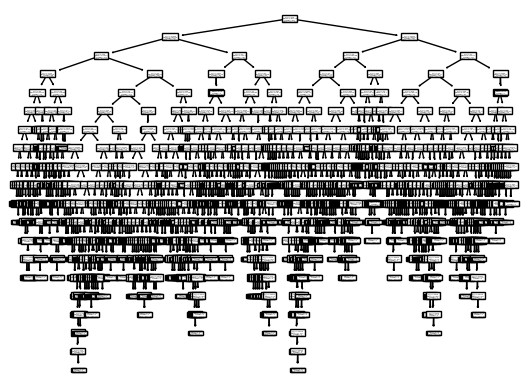

In [153]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [154]:
y_pred=regressor.predict(x_test)

In [155]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [156]:
r_score

0.7181117703768505